In [2]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
# Opening file, reading, eliminating whitespaces, and splitting by '\n', which in turn creates list
labels = open('C:\\Users\\KIIT\\Desktop\\PROJECTS\\TRAFFIC CLASSIFICATION\\coco.names').read().strip().split('\n')  # list of names

# # Check point
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
# Defining paths to the weights and configuration file with model of Neural Network
weights_path = 'C:\\Users\\KIIT\\Desktop\\PROJECTS\\TRAFFIC CLASSIFICATION\\yolov3.weights'
configuration_path = 'C:\\Users\\KIIT\\Desktop\\PROJECTS\\TRAFFIC CLASSIFICATION\\yolov3.cfg'

In [5]:
# Setting minimum probability to eliminate weak predictions
probability_minimum = 0.6

# Setting threshold for non maximum suppression
threshold = 0.3

In [6]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

In [7]:
# Getting names of all layers
layers_names_all = network.getLayerNames() 
print(layers_names_all) # list of layers' names

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [8]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
classes=[]


with open("C:\\Users\\KIIT\\Desktop\\PROJECTS\\TRAFFIC CLASSIFICATION\\coco.names",'r') as f:
    classes=f.read().splitlines()

In [10]:
classes


['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [11]:
image_input = cv2.imread('C:\\Users\\KIIT\\Desktop\\PROJECTS\\TRAFFIC CLASSIFICATION\\Screenshot 2024-04-28 173304.png')

# Getting image shape
image_input_shape = image_input.shape

# Check point
print(image_input_shape)  # tuple of (917, 1222, 3)


(517, 696, 3)


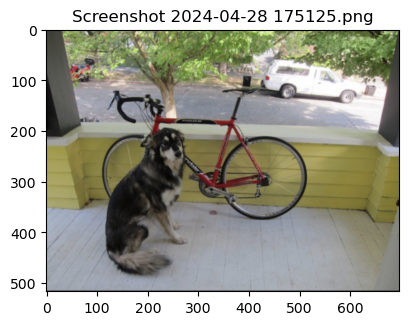

In [12]:
# Showing RGB image but firstly converting it from BGR format
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.title('Screenshot 2024-04-28 175125.png')

plt.show()


In [13]:
# The 'cv2.dnn.blobFromImage' function returns 4-dimensional blob
# from input image after mean subtraction, normalizing, and RB channels swapping
# Resulted shape has number of images, number of channels, width and height
# E.G.: blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
# Link: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
# Preprocess the first image using cv2.dnn.blobFromImage
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
height, width = image_input_shape[:2]
height, width

(517, 696)

In [14]:
print(image_input.shape)  # (806, 1084, 3)
print(blob.shape)  # (1, 3, 416, 416)

(517, 696, 3)
(1, 3, 416, 416)


In [15]:
network.setInput(blob)

In [16]:
# Get the names of the output layers
output_layers_name = network.getUnconnectedOutLayersNames()

# Forward pass the first image through the network
layer_output = network.forward(output_layers_name)

In [17]:
boxes = []
confidences= []
class_ids = []

for output in layer_output:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [18]:
len(boxes)

11

In [19]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [20]:
font=cv2.FONT_HERSHEY_COMPLEX_SMALL
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [21]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv2.rectangle(image_input, (x, y), (x+w, y+h), color, 2)  # Thin bounding box
    cv2.putText(image_input, label+" "+confi, (x, y+20), font, 2, (0, 0, 0), 1)
    

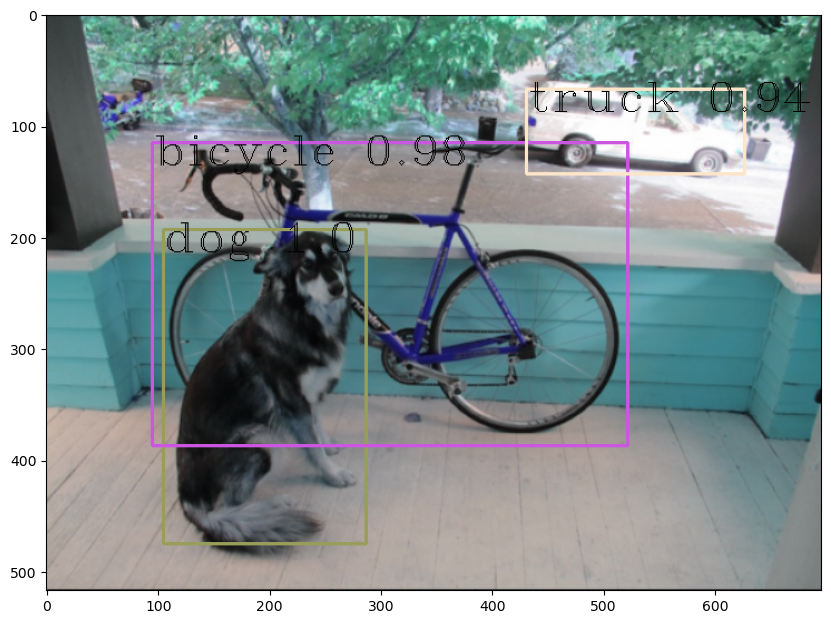

In [22]:
plt.imshow(image_input)